__Лекция 3. Полносвязные нейронные сети__

__О чём эта лекция__

- Что такое полносвязные нейронные сети
- Как они выглядят
- Каковы их возможности
- Как их обучают


__Линейные модели__


$ \sum_\limits{j=1}^{n} x^j w_j + w_0$ -линейная регрессия

$ \sigma( \sum_\limits{j=1}^{n} x^j w_j + w_0) $ - логистическая регрессия, $ \sigma (z) =  \dfrac{1}{1+e^{-z}} $ 

$x^j$ - признаки, $w_j$ - веса признаков. $w_0$ - bias (может быть любым числом, часто 1 или -1).

__Что такое нейрон?__

Нейрон - обобщение двух предыдущих моделей:

$$ \sigma(\sum_{j=0}^{n} x^j w_j) $$

$ \sigma $ - функция активации нейрона  
Когда $ \sigma(z) = z $ - получаем линейную регрессию  
Когда $ \sigma(z) = \dfrac{1}{1+e^{-z}} $ - получаем логистическую регрессию

__Нейрон = линейная регрессия + функция активации.__


__Что может один нейрон?__

Берем линейную регрессию и функцию акцивации sign. Теперь мы можем:  
- Реализовать логическое "И":  $$ x^1 \land x^2 = x^1 + x^2 - 1.5 > 0 $$
![](and.png)

__Что может один нейрон?__

- Реализовать логическое "ИЛИ":  $$ x^1 \lor x^2  = x^1 + x^2 - 0.5 > 0 $$  
![](or.png)

__Что может один нейрон?__
- Реализовать логическое "НЕ":  $$ \lnot x^1 = -x^1 + 0.5 > 0 $$
![](not.png)

__Что не может один нейрон?__

- Линейная модель строит линейную раздедяющую поверхность. 
- Как тогда решить такую задачу?
![](xor_task.png)

__Задача XOR__

- Первый способ: добавить ещё один признак $x^3 = x^1 x^2 $
   - Тогда в пространстве из трёх признаков можно построить линейную разделяющую поверхность
   
   $$ x^1 \oplus x^2  = x^1 + x^2 - 2 x^1 x^2 -0.5 > 0$$
   
![](xor_feature.png)

__Задача XOR__

- Второй способ: построить нейронную сеть, использовать выходы одних нейронов как входы для других
- (соединение линейных регрессий с функциями активаций) 
$$ x^1 \oplus x^2  = (x^1 \lor x^2) - (x^1 \land x^2) -0.5 > 0 $$
![](xor.png)

__Задача XOR__

Нейронная сеть с предыдущего слайда строит нелинейную разделяющую поверхность:
![](xor_nn.png)

__Задача XOR__

__Важно__ - мы использовали _нелинейную_ функцию активации (sign) внутри сети.

- Вот как выглядит результат, если мы уберем sign везде кроме выхода (просто используем композицию линейных регрессий)
- В данном случае мы даже не получим разделяющей поверхности
- В общем случае модель останется линейной и мы получим лишь линейную разделяющую поверхность
![](xor_linear.png)

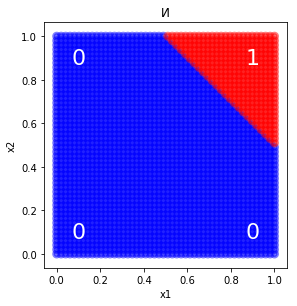

In [80]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def plot_point(x1, x2, text, color='white'):
    plt.text(x1, x2, text, fontsize=22, 
             horizontalalignment='center', 
             verticalalignment='center', 
             color=color)


def plot_surface(func, title, start=0, lim=1):
    abscisses = []
    ordinates = []
    colors = []
    for x1 in np.linspace(start, lim, 50):
        for x2 in np.linspace(start,lim,50):
            color = 'red' if func(x1, x2) else 'blue'
            abscisses.append(x1)
            ordinates.append(x2)
            colors.append(color)
    plt.axes().set_aspect('equal')
    plt.tight_layout()
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    for x1 in [0.1, 0.9]:
        for x2 in [0.1, 0.9]:
            plot_point(x1, x2, int(func(x1, x2)))
    plt.scatter(abscisses, ordinates, color=colors, alpha=0.5, lw=3)

plot_surface(lambda x1,x2: x1+x2-1.5>0, "И")
plt.savefig('and.png')

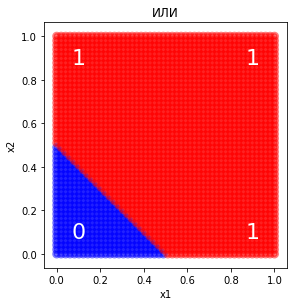

In [57]:
plot_surface(lambda x1,x2: x1+x2-0.5>0, "ИЛИ")
plt.savefig('or.png')

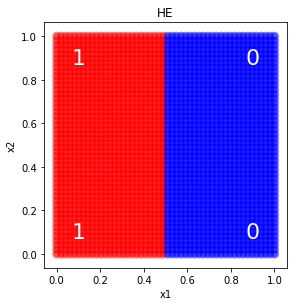

In [102]:
plot_surface(lambda x1,x2: -x1+0.5>0, "НЕ")
plt.savefig("not.png")

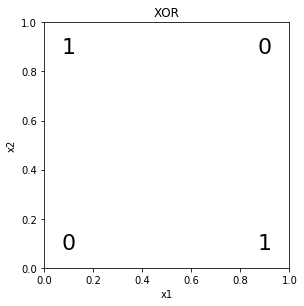

In [63]:
plt.axes().set_aspect('equal')
plt.tight_layout()
plt.title("XOR")
plt.xlabel("x1")
plt.ylabel("x2")
plot_point(0.1, 0.1, 0, color='black')
plot_point(0.1, 0.9, 1, color='black')
plot_point(0.9, 0.1, 1, color='black')
plot_point(0.9, 0.9, 0, color='black')
plt.savefig("xor.png")

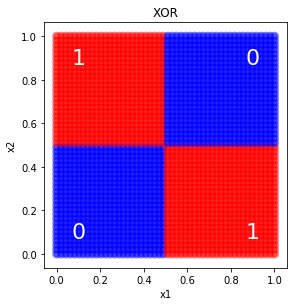

In [96]:
plot_surface(lambda x1, x2: x1+x2-2*x1*x2 - 0.5>0, 'XOR')
plt.savefig("xor_feature.png")

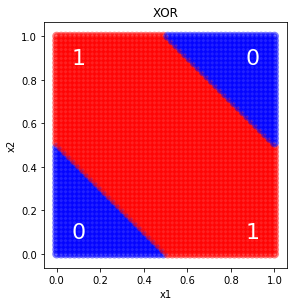

In [97]:
def xor_nn(x1, x2):
    _and = int(x1+x2-1.5>0)
    _or = int(x1+x2-0.5>0)
    return int(_or - _and - 0.5 > 0)

plot_surface(xor_nn, "XOR")
plt.savefig("xor_nn.png")

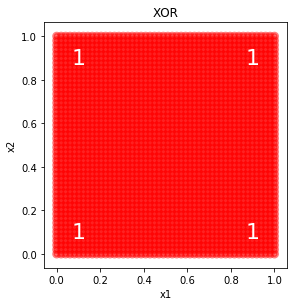

In [98]:
def xor_nn(x1, x2):
    _and = x1+x2-1.5
    _or = x1+x2-0.5
    return int(_or - _and - 0.5 > 0)

plot_surface(xor_nn, "XOR")
plt.savefig("xor_linear.png")

__Нейронные сети как граф вычислений__

Известная из мат. логики формула
$$ x^1 \oplus x^2 = (x^1 \lor x^2) \land {\lnot (x^1 \land x^2)} $$  

где $\land, \lor, \lnot$ - нейроны с предыдущих слайдов и функцией активации $sign$. 

Результат - нейронная сеть, которую мы рассмотрели на предыдущих слайдах.

* Нейронная сеть - граф вычислений (суперпозиция слоев - функций) над признаками. 
* Таким образом с ними работают в современных библиотеках (tensorflow, pytorch, keras...)

* Это язык описания архитектур нейронных сетей

Какие бывают архитектуры нейронных сетей?
![](model.png)

In [2]:
from keras.utils import plot_model
from keras.layers import Layer, Input, Concatenate
from keras import Model


class And(Layer):
    pass

class Or(Layer):
    pass

class Not(Layer):
    pass

x=Input(shape=(2,), name='x')
a_and_b=And(name='')(x)
a_or_b=Or()(x)
not_a = Not()(a_and_b)
model = And()([a_or_b, not_a])
plot_model(Model(inputs=x, outputs=model), show_layer_names=False, rankdir='LR')

__Виды нейронных сетей__

Существуют разные типы слоев (операций) и типы архитектур нейронных сетей:

- полносвязные
- сверточные
- рекуррентные
- рекурсивные

__Виды нейронных сетей__


При этом:

- В сверточных сетях используются полносвязные слои
- В рекуррентных сетях аналогично могут использоваться свертки
- и так далее

Почему?
- Так происходит т.к. сеть - граф вычислений в котором могут встречаться разные операции

Далее рассмотрим самый простой тип - полносвязные нейронные сети.

__Пример полносвязной нейронной сети__

У полносвязной нейронной сети каждый нейрон текущего слоя связан с каждым нейроном предыдущего.

Пример для двух слоев:

![](fully_connected.png)

__Нейронные сети__

Вопрос: Чем параметры модели отличаются от гиперпараметров?


__Нейронные сети - параметры и гиперпараметры__

Обучаемые параметры:
- Веса сети - $w_{ij}$ - вес связи нейрона\признака $i$ и нейрона $j$

Гиперпараметры:
- Архитектура сети
   - Количество слоев
   - Количество нейронов в слоях
   - Используемые функции активации
   - ...

На практике встречаются исключения, например функции активации с обучаемыми параметрами

__Нейронные сети - реальность__

Что говорим:

- Нейроны, связи, веса, активации...

Что происходит _на самом деле_:

- Матрицы умножаются на вектора и от них вычисляются нелинейные функции

$$ \sigma (\sum w_{ji} x_{kj}) = \sigma(W^T x) $$ 

Это причина почему нейронные сети обучают на GPU:
- архитектура SIMD (single instruction multiple data) 
- можно быстро умножать матрицы и применять функции на векторы

__Выразительная способность нейронных сетей__

- Нейронная сеть с одним скрытым слоем может отделить в $R^n$ любой многогранник
- Нейронная сеть с двумя скрытыми слоями может отделить в $R^n$ произвольную многогранную область
    - возможно не связную
    - возможно не выпуклую
- Нейронной сетью с одним скрытым слоем и нелинейной функцией активации (предыдущий слайд) можно приблизить любую непрерывную функцию с наперед заданной точностью


__Выразительная способность нейронных сетей__

Таким образом нейронные сети являются универсальными аппроксиматорами. 
- Теоретически двух-трёх слоев достаточно
- На практике часто используют глубокие нейронные сети для встроенного обучения признаков

__Обучение нейронных сетей__

- Как-правило для обучения сети требуется довольно большая выборка
- Функция потерь нейронной сети на практике не выпуклая

Поэтому для обучения нейронных сетей сейчас применяют вариации метода стохастического градиентного спуска (как правило с использованием mini-batch).


__Обучение нейронных сетей__

Проблема:

На каждом шаге стохастического градиентного спуска нужно вычислить градиент ошибки. Как это сделать эффективно?

Решение:

Метод обратного распространения ошибки (Backprop)

__Алгоритм обратного распространения ошибки__

Идея, производная сложной функции:

$$f(g(h(x))' = f'(g) g'(h) h'(x)$$ 

Наивный подход:
```
d_f_x = d(f, g) * d(g, h) * d(h, x)
d_f_h = d(f, g) * d(g, h)
d_f_g = d(f, g)
```
Обратное распространение ошибки:
```
acc = 1
derivatives = []
for deriv in [d(f, g), d(g, h), d(h, x)]:
    acc *= deriv
    derivatives.append(acc)
d_f_x, d_f_h, d_f_g = derivatives
```

__Алгоритм обратного распространения ошибки__

На практике у каждой функции есть обучаемые параметры и наша задача посчитать производные по всем параметрам:

$$ f(A, g(B, h(C, x)))$$
```
A = parameter()
B = parameter()
C = parameter()
x = input()
h = Func(C, x)
g = Func(B, h)
f = Func(A, g)
```

__Алгоритм обратного распространения ошибки__

Считаем прямой ход

$$ output = f(A, g(B, h(C, x)))$$
```
def forward(f, x):
    layers = f.layers() # возвращает [f, g, h]
    output = x
    for layer in layers[::-1]: # сначала h, потом g, потом f
        output = layer(output)
        layer.output = output
    return output

output = forward(network, x)
```

__Алгоритм обратного распространения ошибки__


Считаем обратный ход

$$ \dfrac{\partial f}{d A}, \dfrac{\partial f}{d B}, \dfrac{\partial f}{d C}$$
```

def backprop(f):
    layers = f.layers()
    f.grad = 1
    for layer in network: # f, g, потом h
        for parameter in layer.parameters(): # [A, g] для f, [B, h] для g, [C] для h
            parameter.grad = layer.grad * layer.derivative(parameter, layer.output)
    return f['A'].grad, f['B'].grad, f['C'].grad # градиент
           
```

__Алгоритм обратного распространения ошибки__

Наблюдения:
 - значение производной можно получить запустив сеть "наоборот"
 - вычисление производной суть последовательное применение правила дифф. сложной функции над компонентами сети:
    - слоями
    - функциями активаций

__Алгоритм обратного распространения ошибки__

- Прямой ход:
    - Применить слой за слоем на данный пример, посчитать значение функции потерь от выходов
- Обратный ход:
    - Считать значения производных слой за слоем в обратном направлении от выходов к входам
        - Используя правило дифференцирования сложной функции
        - Считать сначала производные ошибки от выходов, затем производные ошибки от последнего скрытого слоя и т.д. пока не будут расчитаны производные по всем весам

Посчитаный градиент использовать для расчета шага в стохастическом градиентном спуске.

__Алгоритм обратного распространения ошибки на графе__

Рассмотрим общий случай:
 - нейронная сеть - это граф вычислений
 - Вершины - операции:
     - Умножение вектора на матрицу
     - Применение функции активации

Вопрос:  
Что нужно уметь считать для каждой вершины графа, чтобы реализовать алгоритм обратного распространения ошибки?

__Алгоритм обратного распространения ошибки на графе__

Алгоритм backprop применяют к нейронным сетям как к графу вычислений.
Для каждой вершины нужно знать:
* как по входам вычислить её значение (прямой ход)
* как посчитать её производная от выходов (обратный ход)



__Алгоритм обратного распространения ошибки__ 

Таким образом построение нейронных сетей превращается из упражнений по дифференцированию и матричной алгебре в описание графов вычислений из заданных компонент (вершин). Обычно предоставляются:
- автоматическое дифференцирование графов - алгоритм обратного распространения ошибки
- набор компонент для построения сетей (слои, функции активации...)
- набор оптимизаторов для обучения

Далее поговорим подробнее об обучении и борьбе с переобучением.

__Стохастический градиентный спуск__

![](sgd_linreg_1d.png)

__Стохастический градиентный спуск__

Быстрая сходимость к окрестности оптимума, не может сойтись к конкретной точке (без уменьшения скорости обучения)

![](sgd_convergence.png)

__Momentum__

Существует приличное множество модификаций стохастического градиентного спуска, все из которых используются на практике при обучении сетей:
- Обычный градиентный шаг $\eta_t \nabla_t$

- Momentum - экспоненциальное скользящее среднее по $\approx \dfrac{1}{1-\gamma}$ итерациям спуска:
$$h_t = \alpha h_{t-1}  + \eta_t \nabla_t$$
$$w_t=w_{t-1}-h_t$$
  - На деле это напоминает среднее по N последним итерациям спуска
  - Старается двигаться в том-же направлении что и на предыдущих итерациях
  - $h_t$ растет в направлении где градиенты с разных шагов чаще положительны
  - Обычно $\alpha = 0.9$

__Momentum__

![](sgd_momentum.png)

__Nesterov Momentum__

- Nesterov momentum:
$$h_t= \alpha h_{t-1} + \eta_t \nabla L(w_{t-1}-\alpha h_{t-1}) $$
$$ w_t = w_{t-1}-h_t$$

- Тоже что и momentum, но градиентный шаг идет из предполагаемой точки где мы окажемся, а не из текущей

__Momentum__
- Физическая аналогия для этих эвристик - накопление импульса при спуске (шар с ненулевой массой)
    
![](momentum.jpeg)

__Методы с адаптивной скоростью обучения__ 

- Adagrad:

   - Скорость обучения своя под каждый параметр:
       - Большая производная от параметра - скорость обучения падает
       - Маленькая производная - скорость обучения растет
   - Подходит для разреженных данных
   - Имеет тенденцию к ранней остановке (до достижения локального минимума)
- RMSProp:
   - decay_rate - гиперпараметр с типичными значениями 0.9, 0.99, 0.999
   - В отличие от Adagrad обновления скорости обучения зависят от последних шагов - нет проблемы ранней остановки

__Методы с адаптивной скоростью обучения__ 

- Adam - сейчас чаще всего используется на практике
    - Объединяет RMSProp и momentum
    - Рекомендуемые значения гиперпараметров `eps = 1e-8`, `beta1 = 0.9`, `beta2 = 0.999`

__Визуализация сходимости методов__
![](optimizers.gif)

__Визуализация сходимости методов__

Наблюдение:
Несмотря на то что это всего-лишь эвристики, они обладают большим влиянием на скорость сходимости спуска.

__Функции активации__

- На практике применяют разные функции активации
- Обычно стараются применять дифференциируемые почти везде (кроме конечного количества точек)

Очень часто используются:
 -  $ \sigma(x) = \dfrac{1}{1+e^{-x}}$ сигмоида, например, на выходе для задачи бинарной классификации

![](sigmoid.png)
- $ softmax(x_j) = \dfrac{e^{x_j}}{\sum_{i}{e^{x_i}}} $ - софтмакс, чаще всего на выходе для задачи с несколькими непересекающимися классами
 

__Функции активации__

$ tanh(x) $ - гиперболический тангенс, предлагался как альтернатива $\sigma(x)$ на скрытых слоях сети
 - В отличии от $\sigma(x)$ имеем $tanh(0)=0$
 - Сети с использованием этой активации легче оптимизируются в сравнении с теми что используют сигмоиду
![](Tanh.gif)

__Функции активации__

$ ReLU(x) = max(x, 0) $ - REctified Linear Unit, широко используется сейчас для скрытых слоёв сетей

- Хорошо показала себя на практике
    - Сети обычно быстрее сходятся в сравнении с sigmoid/tanh
- Легче вычислить в отличие от  $\sigma(x)$ и $tanh(x)$
- Активации достаточно часто могут быть равны нулю
    - Есть модификации, например, LeakyReLU - когда значение !=0 когда x<0

<img src="relu.png" width="50%">

__Dropout__

Идея:
 - Во время обучения (но не применения!) будем случайным образом "выключать" нейроны
 
Мотивы:  
- получаем приближение ансамбля из $2^N$ сетей с общими весами, но разными связями между нейронами
- тренируем сеть наиболее устойчивую к утрате нейронов надеясь что она будет надежной
- заставляем разные части сети решать одну и ту-же задачу, а не компенсировать ошибки других частей

Результат:

Отличный метод борбы с переобучением нейронных сетей

__Инициализация весов__

Почему важно правильно инициализировать веса?

Стохастический градиентный спуск - ищет минимум в окрестности некоторой точки. 

Правильная инициализация весов дает возможность найти лучший локальный минимум.

__Инициализация весов__

Как __не надо__ делать:
 - инициализация одной константой
     - В этом случае все веса так и останутся одинаковыми во время обучения (т.к. получат одинаковые градиенты)

Для неглубоких сетей (2-5 слоев):
 - инициализация небольшими случайными значениями около нуля


__Инициализация весов в глубоких сетях__


Для глубоких сетей применяют спец. методы исходящие из статистических соображений.
- Для симметричных функций активации с нулевым средним (например tanh):
    - инициализация Ксавье 
    $$ w_i \sim \mathcal{N}(0, \sqrt{\dfrac{2}{N_{in}+N_{out}}})$$
    
    где $N_{in}$, $N_{out}$ - размеры входа и выхода слоя
 
- Для остальных (ReLU, sigmoid...):
    - Инициализация Хе
    $$ w_i \sim \mathcal{N}(0, \sqrt{\dfrac{2}{N_{in}}}) $$

- Часто вместо нормального берут равномерное распределение. 

__Нормализация__

Почему полезно?

- Ускоряет сходимость градиентного спуска
- Аналогия: что если сделать тоже самое не для входных данных, а внутри сети?

![](sgd_normalisation.png)

__Нормализация по мини-батчам__

Идея: нормализовать выходы слоев нейронной сети
$$x_{norm} = \dfrac{x-\mathbb{E}[x]}{Var(x)}$$
 - упростит обучение следующего слоя (значения входов не будут сильно сдвигаться по модулю во время обучения)
 - решит проблему "насыщения" функций $tanh$, $sigmoid$ - когда большие по модулю значения дают маленькое изменение после активации

Проблемы:
 - Нормализация по всей обучающей выборке? Неприемлимо трудоемко!
 - Как учесть нормализацию в алгоритме обратного распространения ошибки?

__Нормализация по мини-батчам__

Проблемы:
 - Нормализация по всей обучающей выборке?
 - Как учесть нормализацию в алгоритме обратного распространения ошибки?

Решение:
- Нормализуем не выход целиком, а каждую компоненту отдельно
- Считаем выборочное средние и стандартное отклонение не на всей выборке, а на текущем мини-батче
    - Теперь вычисление локально только для текущего мини-батча
    - Вычисленные значения - приближения таковых для всей выборки
    - Можно посчитать производные для всех весов учавствующих в нормализации т.е. шаг градиентного спуска будет учитывать нормализацию

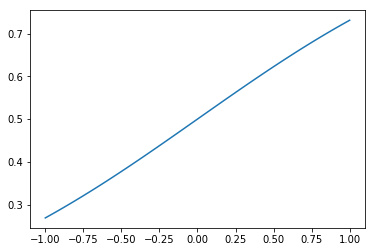

In [105]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))

x=np.linspace(-1, 1, 50)
plt.tight_layout()
plt.plot(x, np.vectorize(sigmoid)(x))
plt.savefig('sigmoid_batchnorm.png')

__Нормализация по мини-батчам__

Проблема:
график сигмоиды в отрезке [-1, 1]:
![](sigmoid_batchnorm.png)
- Наивная нормализация нейтрализует нелинейности функций sigmoid, tanh

__Нормализация по мини-батчам__

Решение:
- Добавить два обучаемых параметра: $\gamma$ - масштаб, $\beta$ - сдвиг.
- В случае необходимости сеть может сама подвинуть нормализацию и восстановить нелинейность

Таким образом итоговая формула (для мини-батча размером $m$).

Выборочное среднее по мини-батчу:
$$\mu_\mathcal{B}=\dfrac{1}{m}\sum_\limits{i=1}^{m}x_i$$ 
Выборочная дисперсия по мини-батчу:
$$\sigma^2_\mathcal{B}=\dfrac{1}{m}\sum_\limits{i=1}^{m}(x_i-\mu_\mathcal{B})^2$$ 
Нормализованный выход слоя:
$$\hat{x_i}=\dfrac{x_i-\mu_\mathcal{B}}{\sqrt{\sigma^2_\mathcal{B}+\epsilon}}$$
Сдвинутый\масштабированный нормализованный выход слоя
$$y_i=\gamma \hat{x_i} + \beta $$ 

__Нормализация по мини-батчам__

До или после активации?

- Авторы метода рекомендовали применять её до нелинейности (функции активации)
- Если применять её после, зачем тогда сдвиг и масштаб?


__Нормализация по мини-батчам__

Эффекты:
- Сильное ускорение сходимости глубоких сетей
- Регуляризация, часто применяется в глубоких сетях вместо dropout слоев

__Заключение__

- Нейронные сети - универсальный аппроксиматор
- На практике сейчас их описывают на языке графов вычислений
- Нейронные сети обычно обучаются вариациями стохастического градиентного спуска
    - градиент вычисляют методом обратного распространения ошибки
- Существует очень большое количество эвристик связанных с обучением нейронных сетей
    - Много модификаций алгоритма стохастического градиентного спуска
    - Дополнительные методы регуляризации (dropout)
    - Специальные методы инициализации весов
    - Нормализация по мини-батчам